# Data Analysis Notebook

This notebook combines data collection (scraping) and data preprocessing.

Steps:
1. **Scrape** reviews from Google Play Store
2. **Preprocess** and clean the data
3. **Visualize** the results

## 1. Run Scraper

This cell runs the scraping script to fetch the latest reviews from the Google Play Store.
The output will show the progress.

In [11]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Add project root to Python path
sys.path.append(os.path.abspath(".."))

try:
    from Scripts.preprocessing import ReviewPreprocessor
    from Scripts.scraper import main as run_scraper
    print("✅ Successfully imported modules from Scripts!")
except Exception as e:
    print("❌ Failed to import modules:", e)


✅ Successfully imported modules from Scripts!


In [12]:
print("🚀 Starting Scraper...")

# Run the main scraper function
raw_df = run_scraper()

print("\n✅ Scraping Finished.")
display(raw_df.head())

🚀 Starting Scraper...
Starting Google Play Store Review Scraper

[1/2] Fetching app information...

CBE: Commercial Bank of Ethiopia
App ID: com.combanketh.mobilebanking
Current Rating: 4.3252034
Total Ratings: 38807
Total Reviews: 8331

Dashen: Dashen Bank
App ID: com.dashen.dashensuperapp
Current Rating: 4.1466665
Total Ratings: 3886
Total Reviews: 769

Abyssinia: Abyssinia
App ID: com.boa.boaMobileBanking
Current Rating: 4.191456
Total Ratings: 6314
Total Reviews: 1216

App information saved to data/raw/app_info.csv

[2/2] Scraping reviews...


Banks:   0%|          | 0/3 [00:00<?, ?it/s]


Scraping reviews for com.combanketh.mobilebanking...
Successfully scraped 400 reviews
Collected 400 reviews for Commercial Bank of Ethiopia


Banks:  33%|███▎      | 1/3 [00:03<00:07,  3.52s/it]


Scraping reviews for com.dashen.dashensuperapp...
Successfully scraped 400 reviews
Collected 400 reviews for Dashen Bank


Banks:  67%|██████▋   | 2/3 [00:06<00:03,  3.40s/it]


Scraping reviews for com.boa.boaMobileBanking...
Successfully scraped 400 reviews
Collected 400 reviews for Abyssinia


Banks: 100%|██████████| 3/3 [00:10<00:00,  3.38s/it]


Scraping Complete!

Total reviews collected: 1200
Reviews per bank:
  Commercial Bank of Ethiopia: 400
  Dashen Bank: 400
  Abyssinia: 400

Data saved to: data/raw/reviews_raw.csv

Sample Reviews

Commercial Bank of Ethiopia:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: It is nice app...
Date: 2025-11-26 12:03:18

Rating: ⭐⭐⭐⭐⭐
Review: best...
Date: 2025-11-25 20:27:20

Rating: ⭐⭐⭐⭐⭐
Review: good app...
Date: 2025-11-25 18:10:35

Dashen Bank:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: its fast and easy to communicate to the app and its available all area keep it up.i will make Happy for this application thank you dashen bank for your effort,commitment and dedication. i appricated y...
Date: 2025-11-26 18:02:58

Rating: ⭐
Review: What do you care about my phone's settings? Who are you to tell me what to turn off and on? It is my phone after all. This *develoler option* thing will cost you a lot of users who

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
0,3d88a334-958c-4717-9f97-c5d46359e054,It is nice app,5,2025-11-26 12:03:18,samson getachew,1,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
1,99d376ea-4824-4af9-a093-27360acc3a5c,best,5,2025-11-25 20:27:20,Nejbadin Ali,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
2,f1861daf-a1ed-407a-9e7c-295edbb3877d,good app,5,2025-11-25 18:10:35,Amman Mom,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
3,fd178fb7-7026-4d02-98a0-5c86c3bd56f5,it suddenly asked me to enter the verification...,1,2025-11-25 17:14:22,Nuredin Adem,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
4,571c66c6-fd18-437b-b8e5-8c443e9db2df,nice app...,5,2025-11-25 10:24:19,Abdulfeta Mifta,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play


## 2. Run Preprocessing Pipeline

Now we clean the scraped data using our `ReviewPreprocessor`.

In [13]:
# Initialize the preprocessor
preprocessor = ReviewPreprocessor()

# Run the process
success = preprocessor.process()

if success:
    print("\n✅ Preprocessing finished successfully!")
    df = preprocessor.df
else:
    print("❌ Preprocessing failed.")

STARTING DATA PREPROCESSING
Loading raw data...
Loaded 1200 reviews

[1/6] Checking for missing data...

Missing values:
  reply_content: 1198 (99.83%)
  app_id: 270 (22.50%)

[2/6] Handling missing values...

[3/6] Normalizing dates...
Date range: 2024-09-26 to 2025-11-26

[4/6] Cleaning text...

[5/6] Validating ratings...
All ratings are valid (1-5)

[6/6] Preparing final output...
Final dataset: 1200 reviews

Saving processed data...
Data saved to: data/processed/reviews_processed.csv

PREPROCESSING REPORT

Original records: 1200
Records with missing critical data: 0
Empty reviews removed: 0
Invalid ratings removed: 0
Final records: 1200

Data retention rate: 100.00%
Data error rate: 0.00%
✓ Data quality: EXCELLENT (<5% errors)

Reviews per bank:
  Abyssinia: 400
  Commercial Bank of Ethiopia: 400
  Dashen Bank: 400

Rating distribution:
  ⭐⭐⭐⭐⭐: 734 (61.2%)
  ⭐⭐⭐⭐: 89 (7.4%)
  ⭐⭐⭐: 67 (5.6%)
  ⭐⭐: 45 (3.8%)
  ⭐: 265 (22.1%)

Date range: 2024-09-26 to 2025-11-26

Text statistics:
 

In [14]:
print("df in globals():", 'df' in globals())
print("df type:", type(df))
print("df shape:", df.shape)


df in globals(): True
df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1200, 12)


## 3. Visualizations

Let's explore the cleaned data.

C:\Users\Birhanu Matebe\AppData\Local\Temp\ipykernel_18336\307724874.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')
C:\Users\Birhanu Matebe\AppData\Local\Temp\ipykernel_18336\307724874.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bank_code', data=df, palette='Set2')


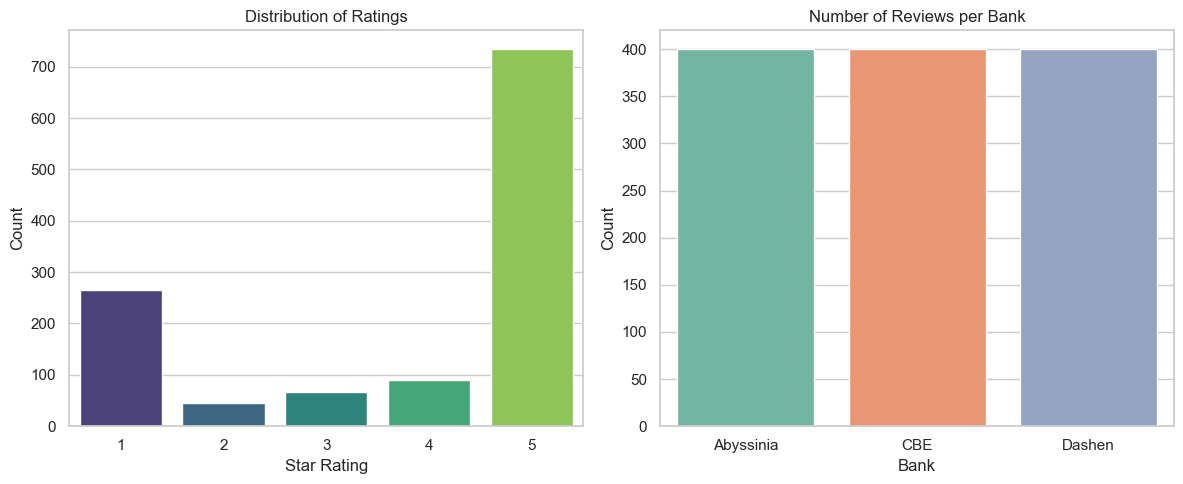

In [15]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# 1. Ratings Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')

# 2. Reviews per Bank
plt.subplot(1, 2, 2)
sns.countplot(x='bank_code', data=df, palette='Set2')
plt.title('Number of Reviews per Bank')
plt.xlabel('Bank')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

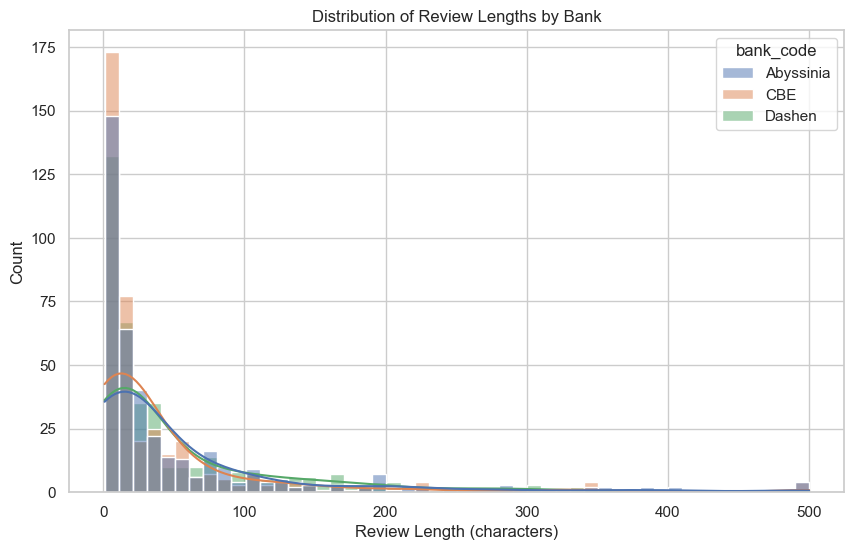

In [16]:
# 3. Review Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50, kde=True, hue='bank_code')
plt.title('Distribution of Review Lengths by Bank')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.show()